In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

dataset = load_iris()

In [17]:
feature_names = dataset.feature_names
x = dataset.data
# in Unsupervised learning, 't(target value)' is not used.
t = dataset.target

In [18]:
pd.DataFrame(x, columns=feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# Dimensionality reduction by Principal component analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(x)
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

In [20]:
# map original values onto principal component( produced axis)
# demensionality reduction
x_transformed = pca.transform(x)
pd.DataFrame(x_transformed, columns=['1st pri', '2nd pri']).head()

,1st pri,2nd pri
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [21]:
# proportion of the variance
# of 1st pri
pca.explained_variance_ratio_[0]

0.924618723201727

In [22]:
# of 2nd pri
pca.explained_variance_ratio_[1]

0.05306648311706785

In [23]:
# 1 - (0.92 + 0.05) = 0.03
# ... 3% data was lost

C:\Users\yTonomura\anaconda3\envs\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

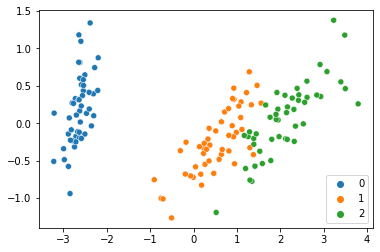

In [24]:
# visualize
sns.scatterplot(x_transformed[:, 0], x_transformed[:, 1],
hue=t, palette=sns.color_palette(n_colors=3))

In [25]:
# when use PCA, at first, standardize the data

# standardization( mean: 0, std: 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA with scaled data
pca2 = PCA(n_components=2, random_state=0)
x_scaled_transformed = pca2.fit_transform(x_scaled)
pd.DataFrame(x_scaled_transformed, columns=['1st pri', '2nd pri']).head()

,1st pri,2nd pri
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [26]:
pca2.explained_variance_ratio_[0], pca2.explained_variance_ratio_[1]

(0.7296244541329985, 0.22850761786701793)

C:\Users\yTonomura\anaconda3\envs\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

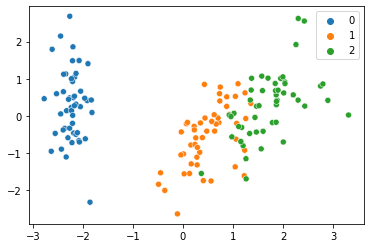

In [27]:
sns.scatterplot(x_scaled_transformed[:, 0], x_scaled_transformed[:, 1],
hue=t, palette=sns.color_palette(n_colors=3))